<a href="https://colab.research.google.com/github/KurapikaZoldyck/KurapikaZoldyck/blob/main/Machine%20Learning/K%20Nearest%20Neighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
data = pd.read_csv('/content/diabetes.csv')
data.head()

In [ ]:
data.isnull().sum()

pregnancies    0
glucose        0
diastolic      0
triceps        0
insulin        0
bmi            0
dpf            0
age            0
dtype: int64

In [ ]:
diabet = data['diabetes']
data.drop('diabetes',1,inplace=True)
data.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

data_ss = ss.fit_transform(data.values)
data = pd.DataFrame(data=data_ss,
                    index=data.index,
                    columns=data.columns)
data.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score
X_train,X_test,y_train,y_test = train_test_split(data,diabet,test_size=0.1,random_state=1)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn =  KNeighborsClassifier(n_neighbors=2)

In [ ]:
cv = cross_val_score(knn,X_train,y_train,cv=5)
cv

array([0.70503597, 0.67391304, 0.69565217, 0.6884058 , 0.71014493])

In [ ]:
cv.mean()

0.6946303826504014

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [ ]:
knn.score(X_train,y_train)

0.8335745296671491

In [ ]:
knn.score(X_test,y_test)

0.7272727272727273

In [ ]:
pred = knn.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns

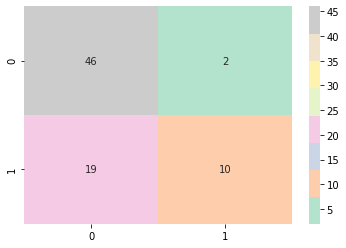

In [ ]:
cm = confusion_matrix(y_test,pred)
sns.heatmap(cm,annot=True,fmt='g',cmap='Pastel2')
plt.show()

In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.71      0.96      0.81        48
           1       0.83      0.34      0.49        29

    accuracy                           0.73        77
   macro avg       0.77      0.65      0.65        77
weighted avg       0.76      0.73      0.69        77

